Number of outliers in each column:


Minimal price (gross) [PLN]               1
Engine power [KM]                         0
Maximum torque [Nm]                       0
Battery capacity [kWh]                    0
Range (WLTP) [km]                         0
Wheelbase [cm]                            1
Length [cm]                               1
Width [cm]                                1
Height [cm]                               2
Minimal empty weight [kg]                 0
Permissable gross weight [kg]             0
Maximum load capacity [kg]                1
Number of seats                           2
Number of doors                           2
Tire size [in]                            0
Maximum speed [kph]                       0
Boot capacity (VDA) [l]                   0
Acceleration 0-100 kph [s]                0
Maximum DC charging power [kW]            0
mean - Energy consumption [kWh/100 km]    0
dtype: int64

--------------------------------------------------------------------------------
Number of outliers in selected column:


Minimal price (gross) [PLN]    1
Wheelbase [cm]                 1
Maximum load capacity [kg]     1
Height [cm]                    2
dtype: int64

--------------------------------------------------------------------------------
Outliers based on Z-score method:
    Minimal price (gross) [PLN]  Wheelbase [cm]  Maximum load capacity [kg]  \
33                       794000           290.0                       575.0   
37                        96900           187.3                       290.0   
50                       215400           327.5                      1056.0   
51                       339480           320.0                       865.0   

    Height [cm]  
33        137.8  
37        155.5  
50        190.0  
51        191.0  


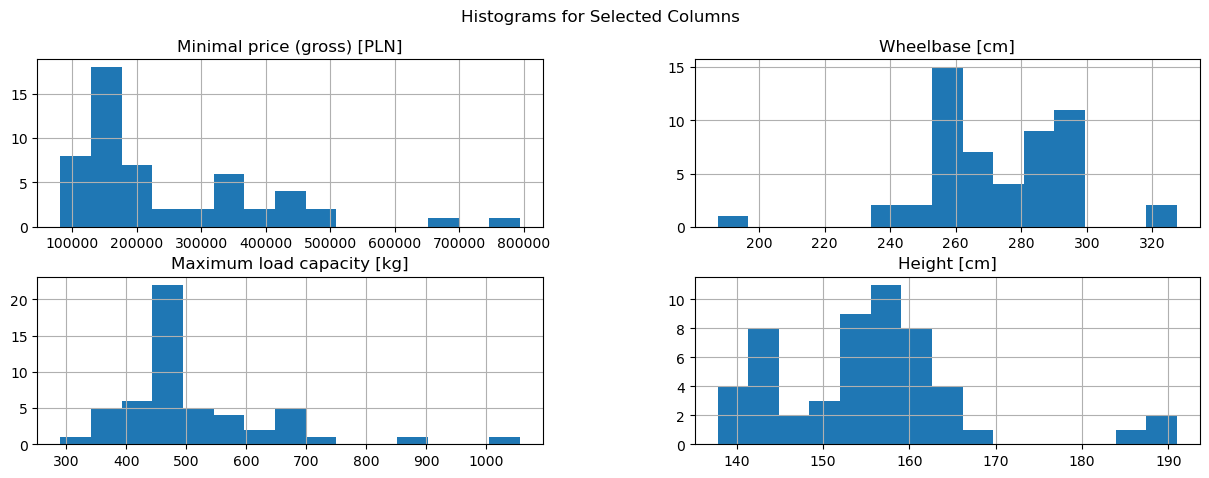

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
ae = pd.read_csv("cleaned_FEV-data-Excel.xlsx - Auta elektryczne.csv") # Load cleaned csv file

#Finding all the columns that has outliers or sudden change in values
numeric_cols = ae.select_dtypes(include=[np.number]).columns      #Selecting all the numeric columns
z_scores = np.abs(zscore(ae[numeric_cols]))      #Finding Z-Score

# Set threshold for Z-score to identify outliers
threshold = 3
outliers = (z_scores > threshold)

# Count outliers per column
outliers_summary = pd.DataFrame(outliers, columns=numeric_cols).sum()
print("Number of outliers in each column:")
display(outliers_summary)

#Based on the above outliers numbers, selecting 3 columns for further analysis
cols_selected = ['Minimal price (gross) [PLN]' , 'Wheelbase [cm]','Maximum load capacity [kg]','Height [cm]']
ae_selected = ae[cols_selected]

z_scores = np.abs(zscore(ae_selected))    #Now calculating Z-score for selected columns
print('-'*80)
# Summarize outliers by column
outliers_summary_z = pd.DataFrame(outliers, columns=cols_selected).sum()
print("Number of outliers in selected column:")
display(outliers_summary_z)
print('-'*80)
# Display the rows with outliers for further inspection
outliers_data_z = ae_selected[(z_scores > threshold).any(axis=1)]
print("Outliers based on Z-score method:")
print(outliers_data_z)

#Displaying Histogram of selected columns
ae_selected.hist(bins=15, figsize=(15, 5))
plt.suptitle("Histograms for Selected Columns")
plt.show()

In [ ]:
'''
As seen in the above plots each of the three columns i.e. Minimal Price (gross), Wheelbase, Maximum Load Capacity and Height column has 
at least 1 value that is unexpectedly higher than the rest of the data.
'''